In [1]:
import os
import cv2
import random
import math
import numpy as np
import datetime as dt
#import tensorflow as tf
import matplotlib.pyplot as plt
#import pandas as pd 

In [2]:
# import os
# import json
# import shutil

# # Define paths
# dataset_path = 'wlasl-processed/videos'
# json_path = 'wlasl-processed/WLASL_v0.3.json'
# train_path = 'wlasl-processed/final_videos'

# # Load JSON file
# with open(json_path, 'r') as f:
#     data = json.load(f)

# # Create directories for each label
# labels = set()
# for item in data:
#     label = item['gloss']
#     if label not in labels:
#         os.makedirs(os.path.join(train_path, label))
#         labels.add(label)

FileExistsError: [Errno 17] File exists: 'wlasl-processed/final_videos/book'

In [ ]:
# # print(data)
# for item in data:
#   label = item['gloss']
#   # print(label)
#   source_path = 'wlasl-processed/videos/'
#   for j in item['instances']:
#     source_path +=  j['video_id'] + '.mp4'
#     filename = ""
#     # if j['split'] == "train":
#     filename = 'wlasl-processed/' + 'final_videos/' + label + '/'
#     # elif j['split'] == "val":
#       # filename = 'wlasl-processed/' + j['split'] + 'idation_data/' + label + '/'
#     # else:
#       # filename = 'wlasl-processed/' + j['split'] + 'ing_data/' + label + '/'
#     target_path = os.path.join(filename)
#     # print(target_path, source_path)
#     if not os.path.exists(source_path):
#       source_path = 'wlasl-processed/videos/'
#       continue
#     shutil.copy(source_path, target_path)
#     source_path = 'wlasl-processed/videos/'

In [2]:
dataset_path = os.listdir('/Users/vedantpadole/Desktop/Research/ASL_MY_DATASET')

all_classes = os.listdir('/Users/vedantpadole/Desktop/Research/ASL_MY_DATASET')
print (all_classes)  
len(all_classes)

['sugar', 'ac', 'bill', 'thank-you', 'water', 'pop corn', 'milk', 'allergy', 'spicy', 'cost', 'chair', 'about', 'french fries', 'warm', 'ingredients', 'burger', 'alcohol', 'eggs', 'what', 'hello', 'pizza', 'drink', 'which', 'gluten free']


24

In [3]:
from os.path import exists

file_exists = exists('100/.DS_Store')

In [4]:
file_exists

False

In [5]:
plt.figure(figsize=(20,20))
random_range=random.sample(range(len(all_classes)),20)
for counter,random_index in enumerate(random_range,1):
  selected_Class=all_classes[random_index]
  video_files_names_list=os.listdir(f'100/{selected_Class}')
  selected_video_file_name=random.choice(video_files_names_list)
  video_reader=cv2.VideoCapture(f'100/{selected_Class}/{selected_video_file_name}')
  _,bgr_frame=video_reader.read()
  rgb_frame=cv2.cvtColor(bgr_frame,cv2.COLOR_BGR2RGB)
  cv2.putText(rgb_frame,selected_Class,(10,30),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)
  plt.subplot(5,4,counter);plt.imshow(rgb_frame);plt.axis('off')
  plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '100/spicy'

In [6]:
IMAGE_HEIGHT,IMAGE_WIDTH=128,128
SEQUENCE_LENGTH=20
DATASET='/Users/vedantpadole/Desktop/Research/ASL_MY_DATASET'
CLASSES_LIST=all_classes

In [7]:
def frames_extraction(video_path):
  frames_list=[]
  video_reader=cv2.VideoCapture(video_path)
  video_frames_count=int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
  skip_frames_window=max(int(video_frames_count/SEQUENCE_LENGTH),1)
  for frame_counter in range(SEQUENCE_LENGTH):
    video_reader.set(cv2.CAP_PROP_POS_FRAMES,frame_counter*skip_frames_window)
    success,frame=video_reader.read()
    if not success:
      break
    resized_frame=cv2.resize(frame,(IMAGE_HEIGHT,IMAGE_WIDTH))
    normalized_frame=resized_frame/255
    frames_list.append(normalized_frame)
  video_reader.release()
  return frames_list

In [8]:
def create_dataset():
  features=[]
  labels=[]
  video_files_path=[]
  for class_index,class_name in enumerate(CLASSES_LIST):
    print(f'Extracting the data of class:  {class_name}')
    files_list=os.listdir(os.path.join(DATASET,class_name))
    for file_name in files_list:
      video_file_path=os.path.join(DATASET,class_name,file_name)
      frames=frames_extraction(video_file_path)
      if len(frames)==SEQUENCE_LENGTH:
        features.append(frames)
        labels.append(class_index)
        video_files_path.append(video_file_path)
  features=np.asarray(features)
  labels=np.array(labels)
  return features,labels,video_files_path

In [9]:
features,labels,video_files_path=create_dataset()

Extracting the data of class:  sugar
Extracting the data of class:  ac
Extracting the data of class:  bill
Extracting the data of class:  thank-you
Extracting the data of class:  water
Extracting the data of class:  pop corn
Extracting the data of class:  milk
Extracting the data of class:  allergy
Extracting the data of class:  spicy
Extracting the data of class:  cost
Extracting the data of class:  chair
Extracting the data of class:  about
Extracting the data of class:  french fries
Extracting the data of class:  warm
Extracting the data of class:  ingredients
Extracting the data of class:  burger
Extracting the data of class:  alcohol
Extracting the data of class:  eggs
Extracting the data of class:  what
Extracting the data of class:  hello
Extracting the data of class:  pizza
Extracting the data of class:  drink
Extracting the data of class:  which
Extracting the data of class:  gluten free


In [37]:
os.remove("ASL_MY_DATASET/.DS_Store")

In [10]:
from keras.utils import to_categorical
one_hot_encoded_labels=to_categorical(labels)

In [11]:
import tensorflow as tf

In [12]:
seed_constant=27
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [13]:
from sklearn.model_selection import train_test_split
features_train,features_test,labels_train,labels_test=train_test_split(features,one_hot_encoded_labels,test_size=0.2,shuffle=True,random_state=seed_constant)

In [14]:
a=features_train.shape[0]

In [15]:
from keras import Sequential
from keras.layers import ConvLSTM2D,MaxPooling3D,TimeDistributed,Dropout,Flatten,Dense
def create_convlstm_model():
  model=Sequential()
  model.add(ConvLSTM2D(filters=4,kernel_size=(3,3),activation='relu',data_format='channels_last',recurrent_dropout=0.2,return_sequences=True,input_shape=(SEQUENCE_LENGTH,IMAGE_HEIGHT,IMAGE_WIDTH,3)))
  model.add(MaxPooling3D(pool_size=(1,2,2),padding='same',data_format='channels_last'))
  model.add(TimeDistributed(Dropout(0.2)))

  model.add(ConvLSTM2D(filters=14,kernel_size=(3,3),activation='relu',data_format='channels_last',recurrent_dropout=0.2,return_sequences=True,input_shape=(SEQUENCE_LENGTH,IMAGE_HEIGHT,IMAGE_WIDTH,3)))
  model.add(MaxPooling3D(pool_size=(1,2,2),padding='same',data_format='channels_last'))
  model.add(TimeDistributed(Dropout(0.2)))

  model.add(ConvLSTM2D(filters=16,kernel_size=(3,3),activation='relu',data_format='channels_last',recurrent_dropout=0.2,return_sequences=True,input_shape=(SEQUENCE_LENGTH,IMAGE_HEIGHT,IMAGE_WIDTH,3)))
  model.add(MaxPooling3D(pool_size=(1,2,2),padding='same',data_format='channels_last'))
  model.add(TimeDistributed(Dropout(0.2)))

  model.add(Flatten())
  model.add(Dense(len(CLASSES_LIST),activation='softmax'))
  model.summary()
  return model

In [16]:
model1=create_convlstm_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 20, 126, 126, 4)   1024      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 20, 63, 63, 4)    0         
 )                                                               
                                                                 
 time_distributed (TimeDistr  (None, 20, 63, 63, 4)    0         
 ibuted)                                                         
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 20, 61, 61, 14)    9128      
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 20, 31, 31, 14)   0         
 3D)                                                             
                                                        

In [17]:
from keras.callbacks import EarlyStopping
early_stopping_call=EarlyStopping(monitor='val_loss',patience=10,mode='min',restore_best_weights=True)
model1.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
r=model1.fit(x=features_train,y=labels_train,epochs=50,batch_size=32,shuffle=True,validation_split=0.2,callbacks=[early_stopping_call])

Epoch 1/50
15/15 [==============================] - 770s 49s/step - loss: 3.1509 - accuracy: 0.0784 - val_loss: 3.0561 - val_accuracy: 0.0957
Epoch 2/50
15/15 [==============================] - 736s 49s/step - loss: 2.6911 - accuracy: 0.2680 - val_loss: 2.2842 - val_accuracy: 0.4957
Epoch 3/50
15/15 [==============================] - 646s 42s/step - loss: 1.7484 - accuracy: 0.6013 - val_loss: 1.6090 - val_accuracy: 0.6174
Epoch 4/50
15/15 [==============================] - 726s 48s/step - loss: 1.1592 - accuracy: 0.7560 - val_loss: 1.3825 - val_accuracy: 0.7043
Epoch 5/50
15/15 [==============================] - 650s 43s/step - loss: 0.8975 - accuracy: 0.7996 - val_loss: 0.8943 - val_accuracy: 0.8261
Epoch 6/50
 6/15 [===========>..................] - ETA: 6:59 - loss: 0.5871 - accuracy: 0.8594

Vedant You Can use canny edge detection in it is easy and looks beautiful and may be helpful as well

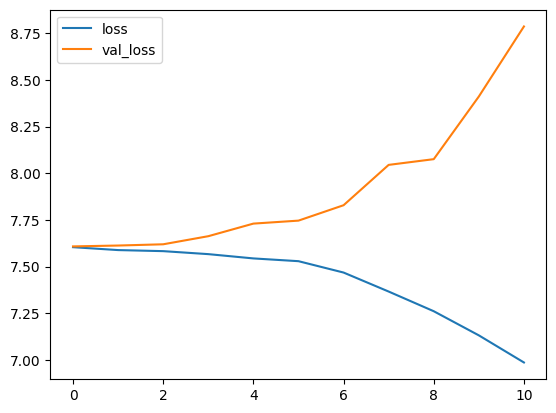

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

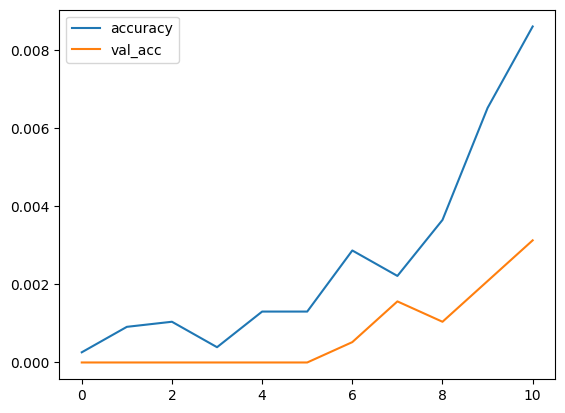

In [ ]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()